# Definition(s)

In the mathematical field of graph theory, a bipartite graph (or bigraph) is a graph whose vertices can be divided into two disjoint sets U and V (that is, U and V are each independent sets) such that every edge connects a vertex in U to one in V. Vertex sets U and V are usually called the parts of the graph. Equivalently, a bipartite graph is a graph that does not contain any odd-length cycles

# Algorithm(s)

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import queue

def bfs_color(graph, node, color):
    q = queue.LifoQueue()
    q.put(node)
    color[node] = 0

    while not q.empty():
        node = q.get()

        for v in graph[node]:
            if color[v] is None:
                color[v] = 1 - color[node]
                q.put(v)
            elif color[v] != 1 - color[node]:
                raise ValueError("graph not bipartite")


def bfs(graph):
    n = len(graph)
    color = [None] * n

    for i in range(n):
        if color[i] is None:
            bfs_color(graph, i, color)

    return color

In [3]:
def draw_graph(graph, figsize=(10, 10)):
    partition = bfs(graph)

    plt.figure(figsize=figsize)
    plt.axis('off')

    colors = ['steelblue', 'red']
    node_color = [colors[partition[i]] for i in graph]
    pos = nx.circular_layout(graph)
    
    nx.draw_networkx(graph, node_size=800, pos=pos, node_color=node_color, font_color='white')

# Run(s)

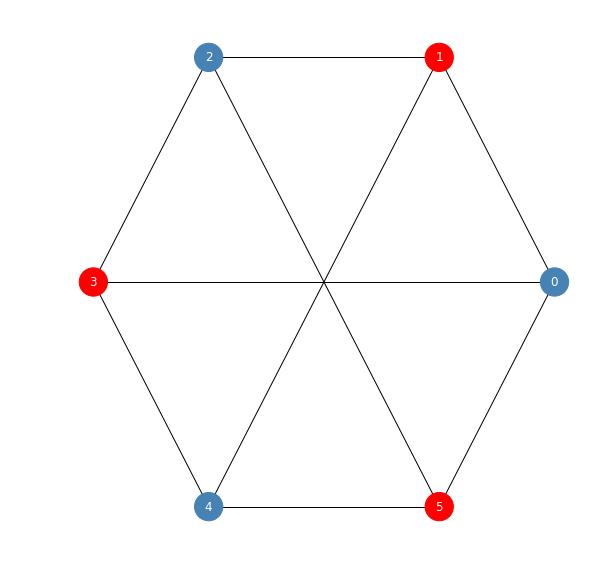

In [4]:
graph = nx.Graph()
graph.add_nodes_from(range(6))
graph.add_edges_from([
    (0, 1), (1, 2), (1, 4),
    (3, 4), (4, 5), (5, 2),
    (0, 5), (2, 3), (3, 0)
])

draw_graph(graph)

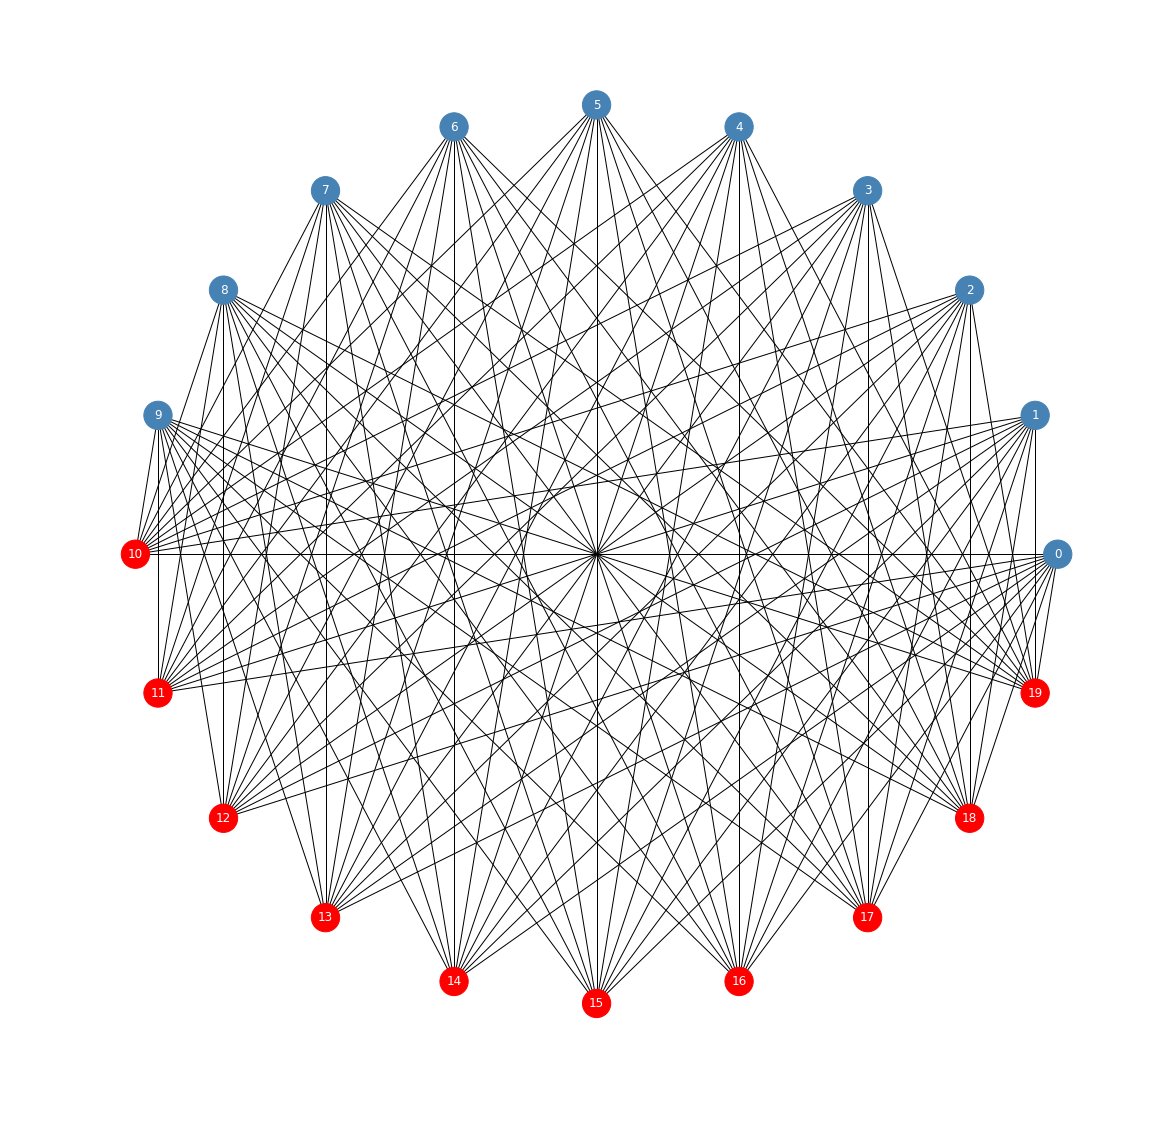

In [5]:
graph = nx.complete_multipartite_graph(10, 10)
pos = nx.circular_layout(graph)
draw_graph(graph, figsize=(20, 20))

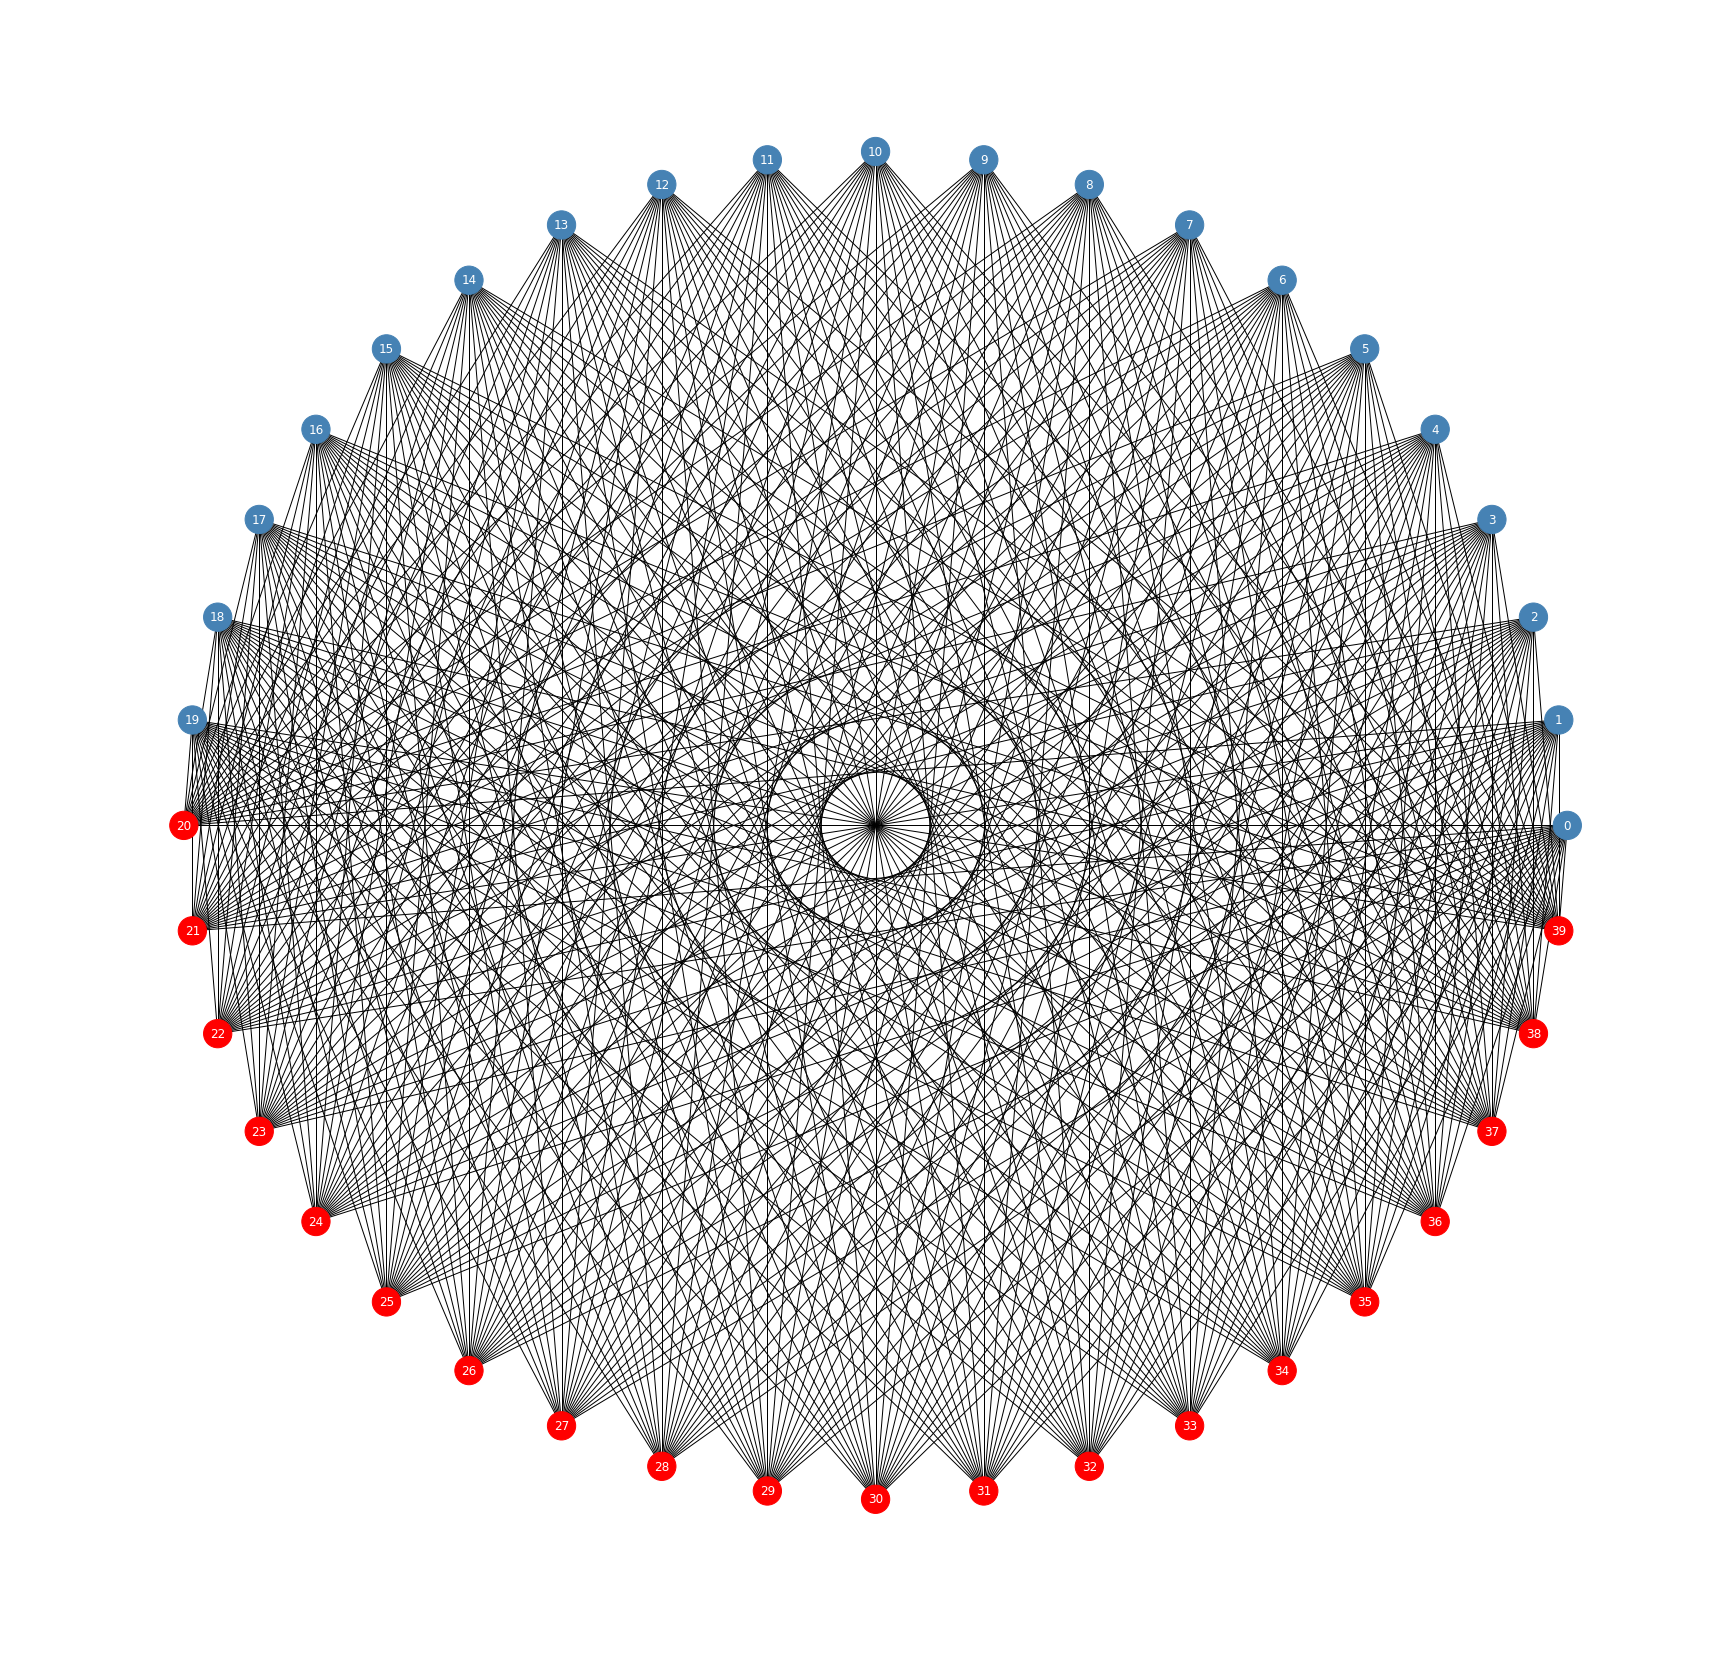

In [6]:
graph = nx.complete_multipartite_graph(20, 20)
pos = nx.circular_layout(graph)
draw_graph(graph,figsize=(30, 30))

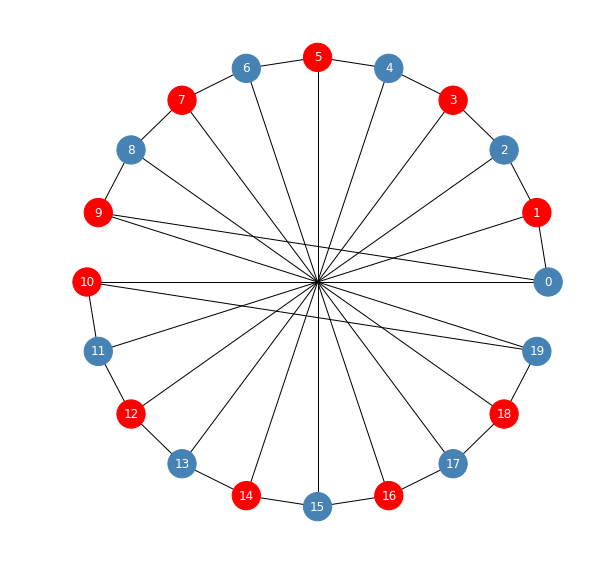

In [7]:
graph = nx.circular_ladder_graph(10)
pos = nx.circular_layout(graph)
draw_graph(graph)

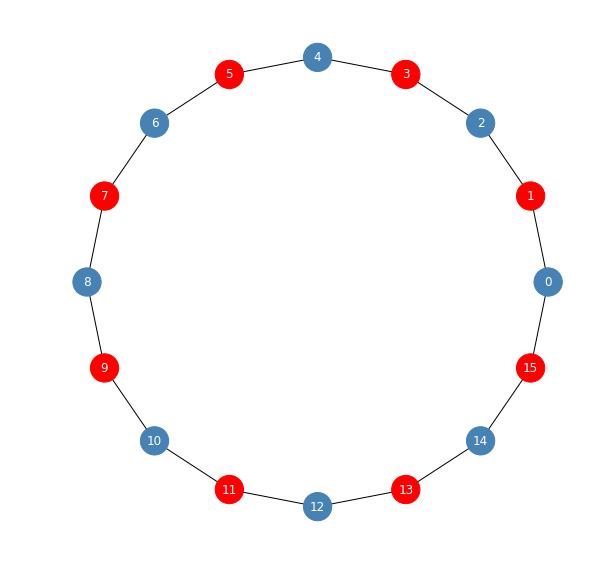

In [8]:
graph = nx.cycle_graph(16)
pos = nx.circular_layout(graph)
draw_graph(graph)

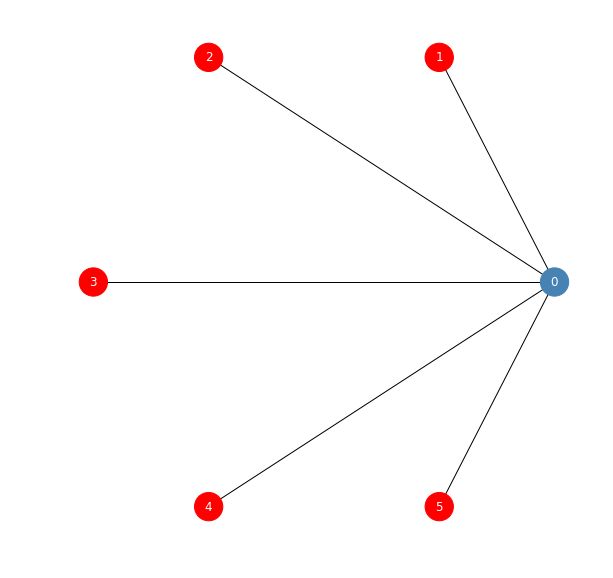

In [9]:
graph = nx.star_graph(5)
pos = nx.circular_layout(graph)
draw_graph(graph)

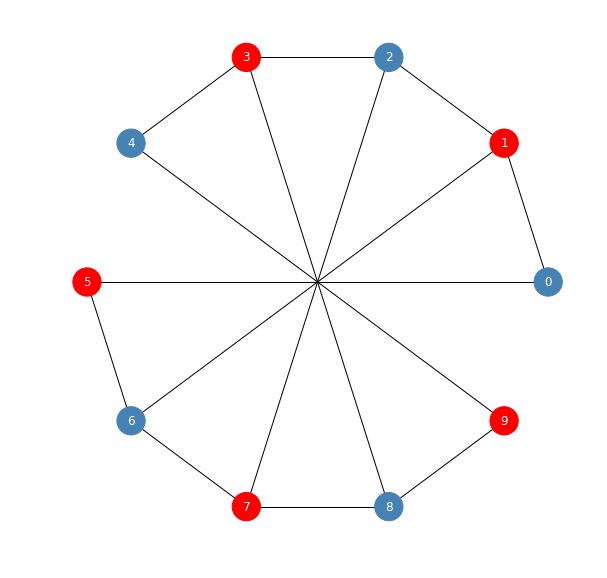

In [10]:
graph = nx.ladder_graph(5)
pos = nx.circular_layout(graph)
draw_graph(graph)

In [11]:
graph = nx.Graph()
graph.add_nodes_from(range(6))
graph.add_edges_from([
    (0, 1), (1, 2), 
    (3, 4), (4, 5), (5, 2),
    (0, 5), (2, 3), (3, 0), (0, 2)
])

draw_graph(graph)

ValueError: graph not bipartite